In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import helpers as h

warnings.filterwarnings('ignore')

%matplotlib inline

### Data Source

This is information that is availabe on the OSPI website: [Washington State Report Card](http://reportcard.ospi.k12.wa.us/DataDownload.aspx). 

- 2018: http://reportcard.ospi.k12.wa.us/Reports/2018/2_03_AIM-WCAS-SBA%20Assessments%20School%20(with%20suppression%20-%20new%20format).txt
- 2017: http://reportcard.ospi.k12.wa.us/Reports/2017/2_03_AIM-EOC-MSP-SBA%20Assessments%20School%20(with%20suppression%20-%20new%20format).txt
- 2016: http://reportcard.ospi.k12.wa.us/Reports/2016/2_03_AIM-EOC-MSP-SBA%20Assessments%20School%20(with%20suppression%20-%20new%20format).txt



In [2]:
#df = pd.read_csv("http://reportcard.ospi.k12.wa.us/Reports/2018/2_03_AIM-WCAS-SBA%20Assessments%20School%20(with%20suppression%20-%20new%20format).txt", sep='\t')
df = h.load_dataset(2018)

### Data Cleanup

This section allows us to get a sense of what is available in the dataset. I'm still looking for a data dictionary that explains some of the abbreviations (What is `PP`?) and jargon (what is `Level2`?). 

But, most of this feels self explanatory.

In [3]:
df.columns

Index(['ESD', 'County', 'District', 'DistrictCode', 'School', 'SchoolCode',
       'schoolYear', 'testAdministration', 'Subject', 'GradeLevel',
       'StudentGroup', 'suppressed', 'suppressReason',
       'countTotalTested_and_NotTested', 'countMetStandardIncludingPP',
       'PercentMetStandardIncludingPP', 'countMetStandardWithoutPP',
       'PercentMetStandardWithoutPP', 'percentMeetingStandardExcludingNoScore',
       'countLevel4', 'PercentLevel4', 'countLevel3', 'PercentLevel3',
       'countLevel2', 'PercentLevel2', 'countLevel1', 'PercentLevel1',
       'countNoScore', 'percentNoScore', 'countNotMet', 'PercentNotMet',
       'countExcusedAbsence', 'countExempted'],
      dtype='object')

In [5]:
# number of rows with empty values
df.isnull().sum().sort_values(ascending=False)

countExcusedAbsence                       233294
countExempted                             193434
PercentLevel3                             143790
countMetStandardIncludingPP               143790
PercentMetStandardIncludingPP             143790
PercentMetStandardWithoutPP               143790
percentMeetingStandardExcludingNoScore    143790
countLevel4                               143790
PercentLevel4                             143790
countLevel3                               143790
countMetStandardWithoutPP                 143790
countLevel2                               143790
countLevel1                               143790
PercentLevel1                             143790
countNoScore                              143790
percentNoScore                            143790
countNotMet                               143790
PercentNotMet                             143790
PercentLevel2                             143790
suppressReason                             89504
ESD                 

In [6]:
# % of rows with empty values
df.isnull().mean().sort_values(ascending=False)

countExcusedAbsence                       1.000000
countExempted                             0.829143
PercentLevel3                             0.616347
countMetStandardIncludingPP               0.616347
PercentMetStandardIncludingPP             0.616347
PercentMetStandardWithoutPP               0.616347
percentMeetingStandardExcludingNoScore    0.616347
countLevel4                               0.616347
PercentLevel4                             0.616347
countLevel3                               0.616347
countMetStandardWithoutPP                 0.616347
countLevel2                               0.616347
countLevel1                               0.616347
PercentLevel1                             0.616347
countNoScore                              0.616347
percentNoScore                            0.616347
countNotMet                               0.616347
PercentNotMet                             0.616347
PercentLevel2                             0.616347
suppressReason                 

In [7]:
# getting rid of information we don't want to keep around (either redudannt, empty, etc.)
remove_cols = [
    'DistrictCode','ESD','SchoolCode','countExcusedAbsence','schoolYear','countExempted',
    'countLevel1','countLevel2','countLevel3','countLevel4',
    'PercentLevel1','PercentLevel2','PercentLevel3','PercentLevel4'
]

df = df.drop(remove_cols,axis=1)

In [8]:
df.describe().round(2)

,countTotalTested_and_NotTested,countMetStandardIncludingPP,PercentMetStandardIncludingPP,countMetStandardWithoutPP,PercentMetStandardWithoutPP,percentMeetingStandardExcludingNoScore,countNoScore,percentNoScore,countNotMet,PercentNotMet
count,233294.00,89504.00,89504.00,89504.00,89504.00,89504.00,89504.00,89504.00,89504.00,89504.00
mean,31.49,34.05,49.96,34.05,49.95,51.33,2.19,2.81,29.42,49.96
std,53.49,42.74,21.93,42.74,21.93,22.02,11.66,7.63,34.45,21.93
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,5.00
25%,2.00,9.00,33.30,9.00,33.30,35.00,0.00,0.00,10.00,32.70
50%,10.00,20.00,50.00,20.00,50.00,52.20,0.00,0.00,18.00,50.00
75%,39.00,41.00,67.20,41.00,67.20,68.70,1.00,2.60,34.00,66.60
max,669.00,559.00,94.90,559.00,94.90,100.00,495.00,94.70,580.00,100.00


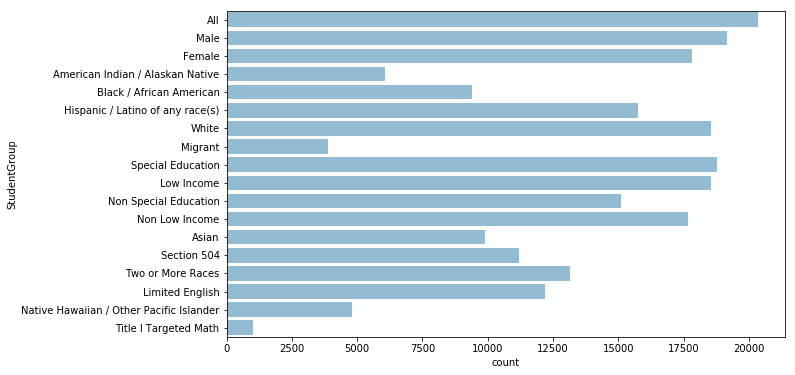

In [9]:
# What type of "StudentGroup" do we have?
base_color = sns.color_palette("Blues")[2]
plt.figure(figsize=[10,6])
sns.countplot(data=df, y='StudentGroup', color=base_color)
plt.show()

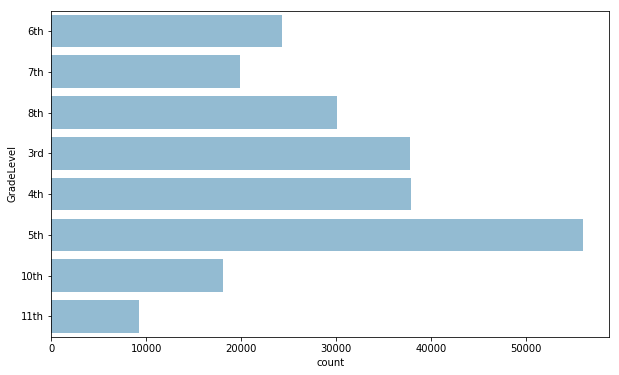

In [10]:
# What type of "GradeLevels" do we have?
base_color = sns.color_palette("Blues")[2]
plt.figure(figsize=[10,6])
sns.countplot(data=df, y='GradeLevel', color=base_color)
plt.show()

### Digging into 3rd Grade

We'll now take a look at just 3rd grade data. The hope / intent of slicing the data set into this cohort is that we can better compare different school performance if we target a single age group. 

In [11]:
# User helper function to filter out 3rd grade
df3 = h.filter_by_grade(df, 3)

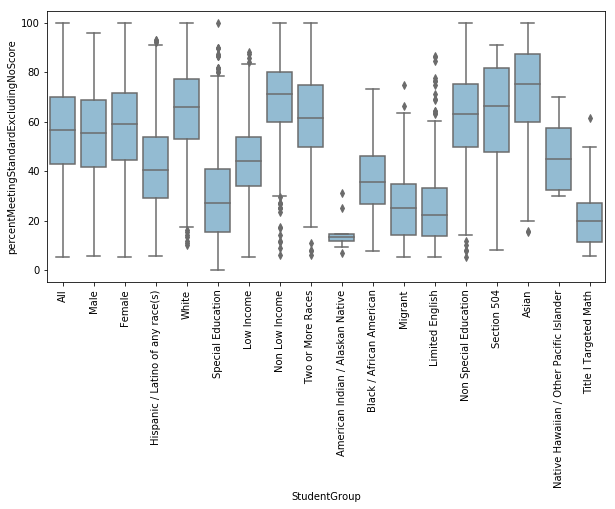

In [12]:
# First look at distribution of scores across different student group cohorts. 
#   Remember - this is all 3rd graders
plt.figure(figsize=[10,5])
sns.boxplot(data=df3, x='StudentGroup', y='percentMeetingStandardExcludingNoScore', color = base_color)
plt.xticks(rotation=90)
plt.show()

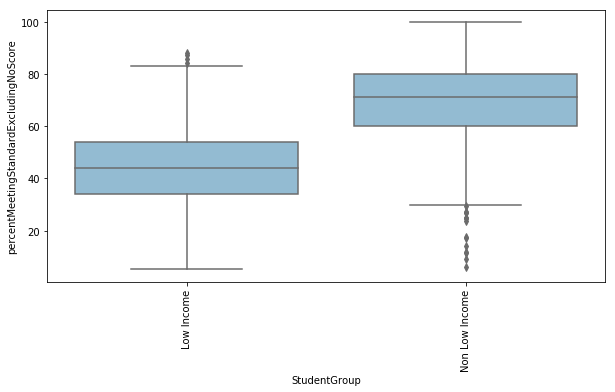

In [13]:
# Another way to look at this is to just look at two student groups
plt.figure(figsize=[10,5])
sns.boxplot(data=df3[(df3["StudentGroup"]=="Low Income") | (df3["StudentGroup"]=="Non Low Income")], 
                      x='StudentGroup', y='percentMeetingStandardExcludingNoScore', color = base_color)
plt.xticks(rotation=90)
plt.show()

The above chart shows the gap between performance from low income and non-low income students. It is one of the larger predictors of test success. Also- make a note at the several outliers of low scores in the non-low income bracket. We'll discuss those in a bit.

Every group will have some difference, but it's more pronounced in a few places -- race and income. One area that has a less pronounced gap is gender. 

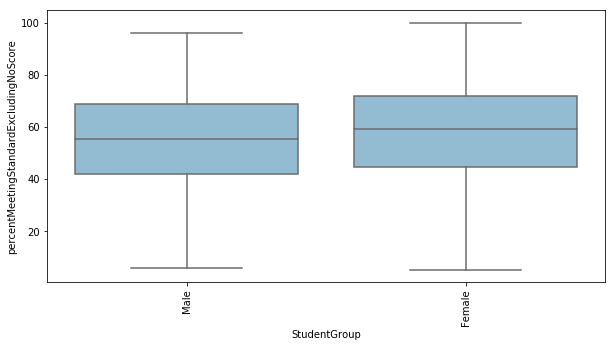

In [14]:
# Analyze gender
plt.figure(figsize=[10,5])
sns.boxplot(data=df3[(df3["StudentGroup"]=="Male") | (df3["StudentGroup"]=="Female")], 
                      x='StudentGroup', y='percentMeetingStandardExcludingNoScore', color = base_color)
plt.xticks(rotation=90)
plt.show()

### Income as a factor in test performance

Let's dig into each school's reported scores. This is a difficult chart to read -- so let me explain it.

1. Each dot represents a school
2. The dashed black line (45 degree angle) is where scores should congregate if these student groups performed exactly the same
3. Any dot below the dashed black line shows performance gap where low income students underperform higher income (and vice versa)

Since most dots are below the dashed line, most schools have some sort of performance gap where income is the factor.

The following chart shows scores in english tests.

<Figure size 720x720 with 0 Axes>

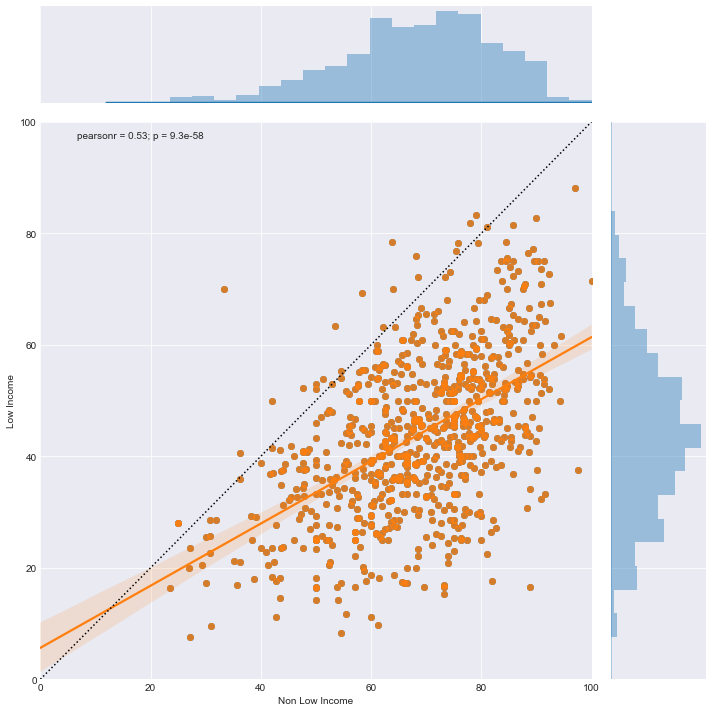

In [46]:
df_ = h.compare_groups(df, 3, 'english', ['Low Income','Non Low Income'], ['percentMeetingStandardExcludingNoScore'])

From this chart, we can see that there are 6 schools that were able to get to an 80% pass rate for both low income and non-low income student groups. These were:

In [47]:
df2018_ela = df3.loc[(df3["StudentGroup"]=="Low Income") & 
                (df3["Subject"]=="ELA") & 
                (df3["percentMeetingStandardExcludingNoScore"] > 80)]

df2018_ela.loc[:,['District', 'School']]

,District,School
26659,Olympia School District,Centennial Elementary Olympia
39564,Kennewick School District,Cottonwood Elementary
55339,Central Kitsap School District,Emerald Heights Elementary
167075,Mead School District,Prairie View Elementary
187590,Tacoma School District,Sherman
227308,West Valley School District (Yakima),Wide Hollow Elementary


Note also in the above chart, that as scores of non-low income student groups grows, so does the gap. We can see this if we plot the ratio of low income to non-low income, as we do below. (1 == equality, while anything below 1 shows a gap)

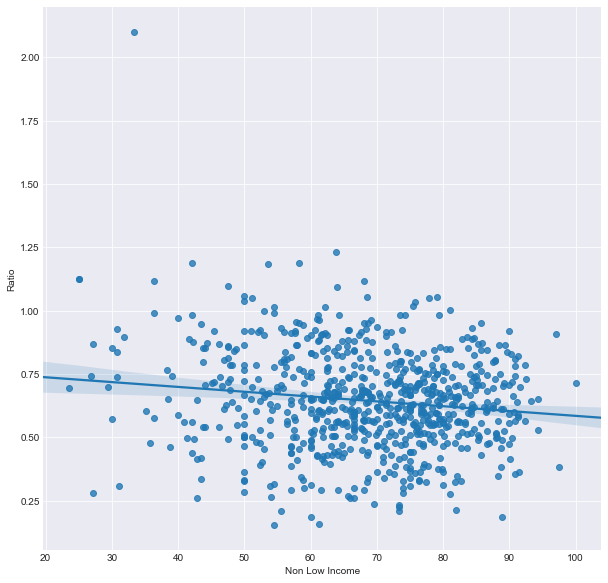

In [48]:
# calculate ratios
df_["Ratio"] = df_["Low Income"] / df_["Non Low Income"]

plt.figure(figsize=(10,10))
sns.set_style('darkgrid')

ax = sns.regplot(x="Non Low Income", y="Ratio", data=df_)

And, this is the same groups, but plotted as math scores shows 11 schools in the low-income group that has 80% pass rate on the math test.

<Figure size 720x720 with 0 Axes>

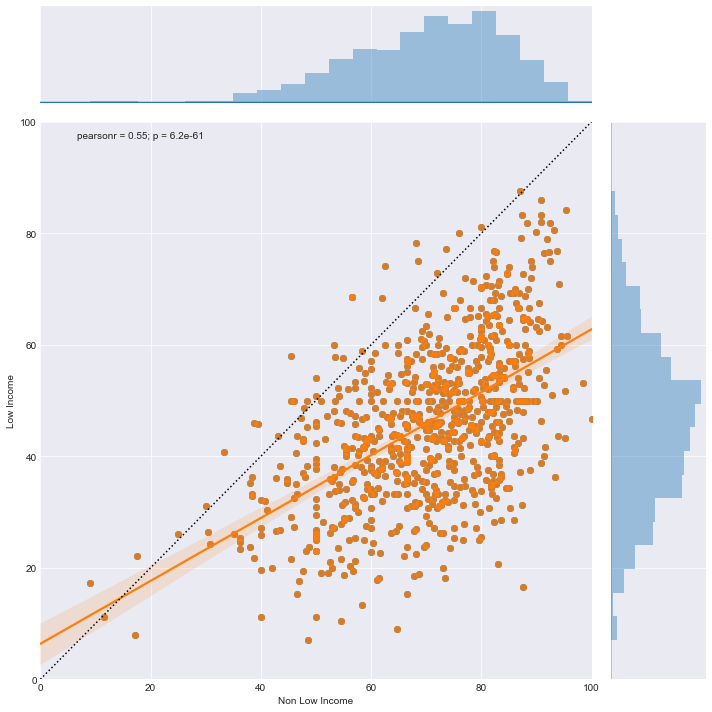

In [49]:
df_ = h.compare_groups(df, 3, 'math', ['Low Income','Non Low Income'], ['percentMeetingStandardExcludingNoScore'])

In [50]:
df2018_math = df3.loc[(df3["StudentGroup"]=="Low Income") & 
                      (df3["Subject"]=="MATH") & 
                      (df3["percentMeetingStandardExcludingNoScore"] > 80)]

df2018_math.loc[:, ['District', 'School']]

,District,School
14986,Shoreline School District,Briarcrest Elementary
69161,Puyallup School District,Fruitland Elementary
76311,Camas School District,Grass Valley Elementary
86622,Zillah School District,Hilton Elementary School
111489,Colfax School District,Leonard M Jennings Elementary
123542,Edmonds School District,Maplewood Parent Coop
139468,White River School District,Mountain Meadow Elementary
140622,East Valley School District (Yakima),Moxee Elementary
193955,Ridgefield School District,South Ridge Elementary
199927,Seattle Public Schools,Stevens Elementary School


### Is the pattern consistent?

Looking at these schools, are they preforming well in all grades and all years?

In [21]:
# Load 3 years of data here
df2018 = h.load_dataset(2018)
df2017 = h.load_dataset(2017)
df2016 = h.load_dataset(2016)

In [51]:
# $TODO this is a hacker shortcut function that is not that re-usable outside of this workbook. 
# just using this to merge annual datasets into a single view
def data_mixologist(grade, subject, group, value):
    # get the groups we care about
    df2018_ = h.get_value_by_grade_subject_student_group(df2018, grade, subject, group, value)
    df2017_ = h.get_value_by_grade_subject_student_group(df2017, grade, subject, group, value)
    df2016_ = h.get_value_by_grade_subject_student_group(df2016, grade, subject, group, value)
    
    # Merge the datasets
    result_ = pd.DataFrame()
    result_ = pd.merge(df2018_, df2017_, how='outer', on=['District', 'School'])
    result_ = pd.merge(result_, df2016_, how='outer', on=['District', 'School'])
    result_.columns = ['District','School','2018','2017','2016']
    return result_

In [52]:
result = data_mixologist(3,'math','Low Income','percentMeetingStandardExcludingNoScore')
result.shape


(1279, 5)

In [53]:
result.loc[(result['2016']>65) & (result['2017']>65) & (result['2018']>65)].shape

(12, 5)

Consistency is an issue - of the 1,279 schools that report data for low-income groups in the past 3 years, only 12 were able to score over 65% consistently. That's 0.9% of the schools. Let's now contrast with non-low income.


In [54]:
resultn = data_mixologist(3,'math','Non Low Income','percentMeetingStandardExcludingNoScore')
resultn.shape

(1312, 5)

In [26]:
resultn.loc[(resultn['2016']>65) & (resultn['2017']>65) & (resultn['2018']>65)].shape

(303, 5)

Consistency is less an issue when non-low income. Of the 670 schools reporting all 3 years, a full 303 were able to score over 65% consistently. That's 47.3% -- or 26x the rate of low income groups! And this pattern is visiable in english learning as well.

In [27]:
result = data_mixologist(3,'english','Low Income','percentMeetingStandardExcludingNoScore')
result.dropna().shape

(671, 5)

In [28]:
result.dropna().loc[(result['2016']>65) & (result['2017']>65) & (result['2018']>65)].shape

(5, 5)

In [29]:
resultn = data_mixologist(3,'english','Non Low Income','percentMeetingStandardExcludingNoScore')
resultn.dropna().shape

(678, 5)

In [30]:
resultn.loc[(resultn['2016']>65) & (resultn['2017']>65) & (resultn['2018']>65)].shape

(242, 5)

Low income groups were able to consistently score about 65 in 5 schools out of 671 (0.75%) versus 242 out of 678 in non-low income (35.7%), nearly 48x the rate of the low income groups. 

### Which schools are high performing for low income groups

While it's siginificantly harder for a school to consistently do well on these tests for their low income students, there were still some schools doing great. Let's find them.

In [31]:
english = data_mixoloist(3,'english','Low Income','percentMeetingStandardExcludingNoScore')
english.dropna().loc[(english['2016']>65) & (english['2017']>65) & (english['2018']>65)]

,District,School,2018,2017,2016
66,Peninsula School District,Artondale Elementary School,75.0,70.0,82.3
963,Auburn School District,Hazelwood Elementary School,67.4,66.0,65.9
994,Lake Stevens School District,Highland Elementary,75.0,84.0,81.5
1259,Colfax School District,Leonard M Jennings Elementary,73.6,70.0,81.8
2246,Ridgefield School District,South Ridge Elementary,78.5,78.5,70.3


In [32]:
math = data_mixologist(3,'math','Low Income','percentMeetingStandardExcludingNoScore')
math.dropna().loc[(math['2016']>65) & (math['2017']>65) & (math['2018']>65)]

,District,School,2018,2017,2016
159,Sedro-Woolley School District,Central Elementary School,68.6,65.5,67.5
175,Bethel School District,Chester H Thompson Elementary,73.6,71.6,69.0
244,Davenport School District,Davenport Elementary,76.6,65.3,68.0
318,Bethel School District,Evergreen Elementary,72.8,69.3,78.3
441,Auburn School District,Hazelwood Elementary School,72.0,82.4,71.7
450,Lake Stevens School District,Highland Elementary,68.7,87.5,73.6
461,Zillah School District,Hilton Elementary School,80.3,80.3,70.3
560,Dieringer School District,Lake Tapps Elementary,65.2,76.1,81.8
661,Kent School District,Martin Sortun Elementary School,70.3,69.0,88.6
729,White River School District,Mountain Meadow Elementary,83.3,70.0,76.1


Three schools are doing well for three consecutive years in english and math. 

- Hazelwood Elementary in Auburn
- Highland Elementary in Lake Stevens
- South Ridge Elementary in Ridgefield

Those are the schools that we should learning from, perhaps? What makes them different than the rest?

### What about consistency across 5th grade?

Can a school do well both at 3rd and 5th grade in low income groups, consistently?

In [33]:
english = data_mixologist(5,'english','Low Income','percentMeetingStandardExcludingNoScore')
english.dropna().loc[(english['2016']>65) & (english['2017']>65) & (english['2018']>65)]

,District,School,2018,2017,2016
169,Tumwater School District,Black Lake Elementary,71.4,73.3,80.9
318,Bethel School District,Centennial Elementary Bethel,78.3,68.1,74.2
521,Dieringer School District,Dieringer Heights Elementary,68.1,82.3,75.0
643,Bethel School District,Evergreen Elementary,72.6,86.7,68.8
849,Camas School District,Grass Valley Elementary,69.2,75.0,72.7
877,Medical Lake School District,Hallett Elementary,69.8,70.2,67.4
1177,Colfax School District,Leonard M Jennings Elementary,66.6,100.0,76.4
2051,Everett School District,Silver Firs Elementary,75.0,71.4,68.7
2163,Lake Stevens School District,Sunnycrest Elementary School,74.1,68.7,69.6


In [34]:
math = data_mixologist(5,'math','Low Income','percentMeetingStandardExcludingNoScore')
math.dropna().loc[(math['2016']>65) & (math['2017']>65) & (math['2018']>65)]

,District,School,2018,2017,2016
76,Sumner School District,Bonney Lake Elementary,73.3,80.0,75.0
313,Bethel School District,Evergreen Elementary,67.1,81.1,73.7
381,Auburn School District,Gildo Rey Elementary School,81.8,69.6,77.2


There is very little overlap with the successful 3rd grade classes and 5th grade classes. 

In [35]:
english.loc[(english['District']=='Auburn School District') & (english['School']=='Hazelwood Elementary School')]

,District,School,2018,2017,2016
919,Auburn School District,Hazelwood Elementary School,53.4,65.2,55.5


In [36]:
math.loc[(math['District']=='Auburn School District') & (math['School']=='Hazelwood Elementary School')]

,District,School,2018,2017,2016
436,Auburn School District,Hazelwood Elementary School,53.4,56.5,51.1


In [37]:
english.loc[(english['District']=='Lake Stevens School District') & (english['School']=='Highland Elementary')]

,District,School,2018,2017,2016
948,Lake Stevens School District,Highland Elementary,63.3,52.3,65.6


In [38]:
math.loc[(math['District']=='Lake Stevens School District') & (math['School']=='Highland Elementary')]

,District,School,2018,2017,2016
446,Lake Stevens School District,Highland Elementary,51.7,42.8,31.2


In [39]:
english.loc[(english['District']=='Ridgefield School District') & (english['School']=='South Ridge Elementary')]

,District,School,2018,2017,2016
2091,Ridgefield School District,South Ridge Elementary,57.6,45.4,56.5


In [40]:
math.loc[(math['District']=='Ridgefield School District') & (math['School']=='South Ridge Elementary')]

,District,School,2018,2017,2016
1001,Ridgefield School District,South Ridge Elementary,38.4,54.5,47.8


Note - this is looking at 3rd graders and 5th graders tested in 2016, 2017, and 2018. There would be some of the 2016 3rd graders in 2016, but to truly look at cohorts, there Student Growth Percentiles (SGP) data. This cohorts students based on year 0 test scores and looks at growth compared to median over subsequent years. More resources are avaialble here: http://www.k12.wa.us/Assessment/StudentGrowth.aspx

In [41]:
english = data_mixologist(5,'english','All','percentMeetingStandardExcludingNoScore')
english.dropna().loc[(english['2016']>65) & (english['2017']>65) & (english['2018']>65)]

,District,School,2018,2017,2016
22,Seattle Public Schools,Adams Elementary School,82.6,83.6,80.3
36,Lake Washington School District,Alcott Elementary,93.6,88.8,88.0
38,Seattle Public Schools,Alki Elementary School,88.8,82.5,82.2
57,Issaquah School District,Apollo Elementary,78.8,82.5,80.1
77,Northshore School District,Arrowhead Elementary,74.1,79.3,81.4
86,Peninsula School District,Artondale Elementary School,67.6,77.3,78.0
96,Lake Washington School District,Audubon Elementary,88.0,88.0,82.6
105,Seattle Public Schools,B F Day Elementary School,74.2,74.4,70.7
137,Seattle Public Schools,Beacon Hill International School,68.9,68.6,75.3
138,Northshore School District,Bear Creek Elementary,89.3,91.3,89.6


In [41]:
math = data_mixologist(5,'math','All','percentMeetingStandardExcludingNoScore')
math.dropna().loc[(math['2016']>65) & (math['2017']>65) & (math['2018']>65)]

,District,School,2018,2017,2016
11,Lake Washington School District,Alcott Elementary,88.6,88.7,79.0
13,Seattle Public Schools,Alki Elementary School,69.8,76.1,72.5
21,Issaquah School District,Apollo Elementary,75.0,80.0,76.2
33,Lake Washington School District,Audubon Elementary,83.1,85.7,81.1
50,Northshore School District,Bear Creek Elementary,90.6,87.6,78.9
58,Bellevue School District,Bennett Elementary School,82.0,85.5,85.1
72,Lake Washington School District,Blackwell Elementary,89.0,88.0,93.5
79,Sumner School District,Bonney Lake Elementary,76.6,82.5,83.1
87,Issaquah School District,Briarwood Elementary,76.9,70.1,70.4
102,Seattle Public Schools,Bryant Elementary School,69.0,86.9,81.3


In [42]:
df2018.loc[(df2018['District']=='Seattle Public Schools') & (df2018['GradeLevel']=='3rd')]["School"].unique().shape

(76,)

In [43]:
df2018.loc[(df2018['District']=='Seattle Public Schools') & 
           (df2018['GradeLevel']=='3rd') &
           (df2018['StudentGroup']=='Low Income') & 
           (df2018['suppressed']=='y')]["School"].unique().shape


(44,)

In [42]:
math = data_mixologist(5,'math','All','percentMeetingStandardExcludingNoScore')

In [43]:
math.quantile(0.9)

2018    73.1
2017    73.9
2016    75.4
Name: 0.9, dtype: float64

In [44]:
math.loc[(math['2016']>=75.4) & (math['2017']>=73.9) & (math['2018']>=73.1)]

,District,School,2018,2017,2016
11,Lake Washington School District,Alcott Elementary,88.6,88.7,79.0
21,Issaquah School District,Apollo Elementary,75.0,80.0,76.2
33,Lake Washington School District,Audubon Elementary,83.1,85.7,81.1
50,Northshore School District,Bear Creek Elementary,90.6,87.6,78.9
58,Bellevue School District,Bennett Elementary School,82.0,85.5,85.1
72,Lake Washington School District,Blackwell Elementary,89.0,88.0,93.5
79,Sumner School District,Bonney Lake Elementary,76.6,82.5,83.1
109,Battle Ground School District,CAM Academy,86.0,89.0,82.3
133,Issaquah School District,Cascade Ridge Elementary,84.4,83.7,94.0
149,Everett School District,Cedar Wood Elementary,89.1,80.6,81.8


In [45]:
math_low = data_mixologist(5,'math','Low Income','percentMeetingStandardExcludingNoScore')

In [48]:
math_low.quantile(0.9)

2018    54.4
2017    55.5
2016    55.7
Name: 0.9, dtype: float64

In [49]:
math_low.loc[(math_low['2016']>=55.7) & (math_low['2017']>=55.5) & (math_low['2018']>=54.4)]

,District,School,2018,2017,2016
76,Sumner School District,Bonney Lake Elementary,73.3,80.0,75.0
146,Everett School District,Cedar Wood Elementary,75.0,61.5,61.5
149,Bethel School District,Centennial Elementary Bethel,67.5,60.4,62.8
304,Evergreen School District (Clark),Endeavour Elementary School,55.2,63.6,55.7
313,Bethel School District,Evergreen Elementary,67.1,81.1,73.7
381,Auburn School District,Gildo Rey Elementary School,81.8,69.6,77.2
921,Pasco School District,Ruth Livingston Elementary,54.8,63.4,59.1
1152,Spokane School District,Westview Elementary,60.7,72.5,70.9
1182,Puyallup School District,Woodland Elementary,58.6,75.0,71.4


In [50]:
math_nonlow = data_mixologist(5,'math','Non Low Income','percentMeetingStandardExcludingNoScore')

In [51]:
math_nonlow.quantile(0.9)

2018    80.06
2017    80.25
2016    80.46
Name: 0.9, dtype: float64

In [52]:
math_nonlow.loc[(math_nonlow['2016']>=80.46) & (math_nonlow['2017']>=80.25) & (math_nonlow['2018']>=80.06)]

,District,School,2018,2017,2016
140,Everett School District,Cedar Wood Elementary,90.5,82.8,84.2
301,Mukilteo School District,Endeavour Elementary,85.7,84.9,84.5
352,Pullman School District,Franklin Elementary,86.8,82.3,82.9
378,Auburn School District,Gildo Rey Elementary School,90.4,87.5,93.3
406,Sequim School District,Greywolf Elementary School,83.0,84.0,82.6
555,Auburn School District,Lakeland Hills Elementary,81.5,85.4,90.6
571,Colfax School District,Leonard M Jennings Elementary,80.9,83.3,87.8
685,Shoreline School District,Meridian Park Elementary School,82.8,82.5,87.0
697,Everett School District,Mill Creek Elementary,88.4,84.6,89.6
732,Mukilteo School District,Mukilteo Elementary,81.9,83.0,84.4


### Factors beyond income: the role of race

Going back to 3rd grade -- how do test scores track along racial divide? Does the gap widen in 5th grade and beyond?

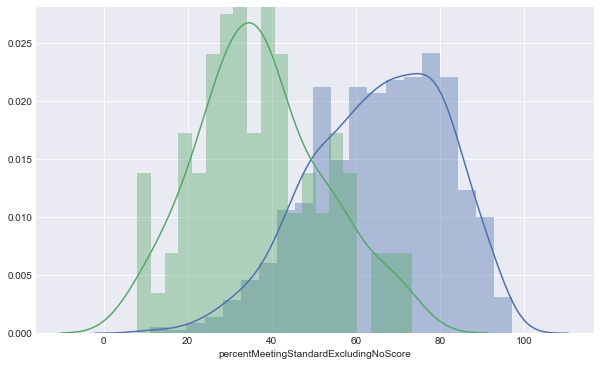

In [86]:
df0 = h.filter_by_grade(df2018, 3)
df0 = h.filter_by_subject(df0, 'math')

plt.figure(figsize=(10,6))


sns.distplot(df0[df0['StudentGroup'].isin(['White'])]["percentMeetingStandardExcludingNoScore"].dropna(), label="White", bins=20)
sns.distplot(df0[df0['StudentGroup'].isin(['Black / African American'])]["percentMeetingStandardExcludingNoScore"].dropna(), label="Black", bins=20)
#sns.kdeplot(df0[df0['StudentGroup'].isin(['Asian'])]["percentMeetingStandardExcludingNoScore"].dropna(), label="Asian")



In [87]:
np.round(df0[df0['StudentGroup'].isin(['White'])]["percentMeetingStandardExcludingNoScore"].dropna().mean(),2)

65.39

In [88]:
np.round(df0[df0['StudentGroup'].isin(['Black / African American'])]["percentMeetingStandardExcludingNoScore"].dropna().mean(),2)

37.52

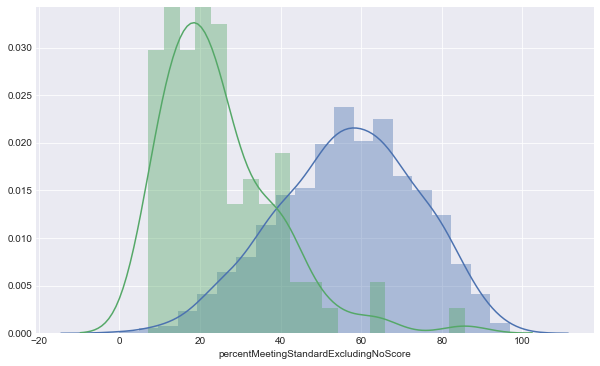

In [89]:
df0 = h.filter_by_grade(df2018, 5)
df0 = h.filter_by_subject(df0, 'math')

plt.figure(figsize=(10,6))


sns.distplot(df0[df0['StudentGroup'].isin(['White'])]["percentMeetingStandardExcludingNoScore"].dropna(), label="White", bins=20)
sns.distplot(df0[df0['StudentGroup'].isin(['Black / African American'])]["percentMeetingStandardExcludingNoScore"].dropna(), label="Black", bins=20)
#sns.kdeplot(df0[df0['StudentGroup'].isin(['Asian'])]["percentMeetingStandardExcludingNoScore"].dropna(), label="Asian")




In [90]:
np.round(df0[df0['StudentGroup'].isin(['White'])]["percentMeetingStandardExcludingNoScore"].dropna().mean(),2)

56.53

In [91]:
np.round(df0[df0['StudentGroup'].isin(['Black / African American'])]["percentMeetingStandardExcludingNoScore"].dropna().mean(),2)

24.78

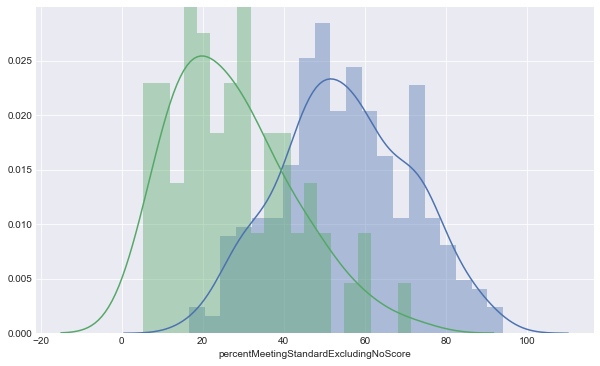

In [94]:
df0 = h.filter_by_grade(df2018, 8)
df0 = h.filter_by_subject(df0, 'math')

plt.figure(figsize=(10,6))


sns.distplot(df0[df0['StudentGroup'].isin(['White'])]["percentMeetingStandardExcludingNoScore"].dropna(), label="White", bins=20)
sns.distplot(df0[df0['StudentGroup'].isin(['Black / African American'])]["percentMeetingStandardExcludingNoScore"].dropna(), label="Black", bins=20)
#sns.kdeplot(df0[df0['StudentGroup'].isin(['Asian'])]["percentMeetingStandardExcludingNoScore"].dropna(), label="Asian")


In [95]:
np.round(df0[df0['StudentGroup'].isin(['White'])]["percentMeetingStandardExcludingNoScore"].dropna().mean(),2)

55.06

In [96]:
np.round(df0[df0['StudentGroup'].isin(['Black / African American'])]["percentMeetingStandardExcludingNoScore"].dropna().mean(),2)

27.3